<a href="https://colab.research.google.com/github/peihsuanlo36/-DTAI-Job-Description-recognize-system/blob/main/DTAI_final_project_%E5%95%86%E6%A5%AD%E5%88%86%E6%9E%90%E9%A0%98%E5%9F%9F%E8%81%B7%E7%BC%BA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[專案步驟大綱]
1. 訓練tokenizer:參考紅樓夢生成器(用pickle存下來)
// 將所有resume併成同一個檔案訓練tokenizer
2. 切出訓練資料集
3. x_train & x_test 用 tokenizer 做轉換
4. 視覺化呈現



# 資料前處理

###  讀入深度學習套件

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

### 訓練 Tokenizer

In [ ]:
## 從Google Cloud call txt file
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/tokenizer0111.txt'
f= open(path,'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 清理文字檔空格 <<< 沒清成功
text_sentence = []
with open(path,"r",encoding='Big5',errors='ignore') as f:
  for i in f.readlines():
    if i.strip() != '':
      text_sentence.append(i.strip())

text =  ''.join(text_sentence)
text[:150]

'JD"【實習】Porsche Taiwan｜Corporate Development & Strategy InternPorsche Taiwan has an internship vacancy in our CEO department.【公司名稱】Porsche Taiwan Motor'

In [ ]:
print(text_sentence)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
n = len(text)
w = len(set(text))
print(f'這個資料集共有{n}個字')
print(f'這個資料集不重複的字有{w}個字')

這個資料集共有2499642個字
這個資料集不重複的字有3163個字


In [ ]:
# 初始化一個以字為單位的 Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=w,
        char_level=True,
        filters=''
)

In [ ]:
tokenizer.fit_on_texts(text)
text_as_int = tokenizer.texts_to_sequences([text])[0]
print(text_as_int[:10])
len(text_as_int)

[140, 15, 53, 37, 39, 38, 36, 14, 7, 9]


2499642

In [ ]:
# 計算不同的字數
max_id = len(tokenizer.word_index)
print(max_id)

3137


In [ ]:
[encoded] = np.array(tokenizer.texts_to_sequences([text]))-1

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(encoded)

In [ ]:
n_steps = 100
window_length = n_steps + 1
dataset = dataset.window(window_length, shift=1, drop_remainder=True)

In [ ]:
dataset = dataset.flat_map(lambda window: window.batch(window_length))

In [ ]:
batch_size=32
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda windows: (windows[:,:-1], windows[:,1:]))

In [ ]:
dataset = dataset.map(lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

In [ ]:
dataset = dataset.prefetch(1)

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape=[None, max_id]))

In [ ]:
model.add(TimeDistributed(Dense(max_id, activation="softmax")))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam')

In [ ]:
history = model.fit(dataset, epochs=1, steps_per_epoch=500)

500/500 [==============================] - 1004s 2s/step - loss: 5.4624


In [ ]:
## model 之儲存
model.save("tokenizer0112")

INFO:tensorflow:Assets written to: tokenizer0112/assets


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/"

In [ ]:
import pickle

In [ ]:
f = open('tokenizer0112.pkl', 'wb')
pickle.dump(tokenizer, f)
f.close()

In [ ]:
# 讀回
f = open('tokenizer0112.pkl', 'rb')
tokenizer = pickle.load(f)
f.close()

In [ ]:
model.summary()

### training / testing 切割

In [ ]:
## import data
import pandas as pd

In [ ]:
## 從Google Cloud call txt file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path0 = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/dataset.xlsx'
data0 = pd.read_excel(path0)
len(data0)

3000

In [ ]:
path111 = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/dataset_final.xlsx'
data1 = pd.read_excel(path111)
len(data1)

3500

In [ ]:
path1 = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/new.xlsx'
new = pd.read_excel(path1)
len(new)

split training data & testing data

In [ ]:
# split 8:2 data0
train0 = data0[0:2400]
test0 = data0[2400:3000]
len(train0)


2400

In [ ]:
len(test0)

In [ ]:
len(train0)

In [ ]:
# split 8:2 data:3500
train1 = data1[0:2800]
test1 = data1[2800:3500]


In [ ]:
len(train)

2800

In [ ]:
len(test)

700

In [ ]:
train = pd.concat([train0,train1],axis=0)
test = pd.concat([test0,test1],axis=0)

In [ ]:
test=test.astype(str)
train=train.astype(str)

### data 轉為 array

In [ ]:
# train_data0
x_train_before = train0['JD'].tolist()
y_train = train0['lebal'].tolist()
len(x_train_before)
len(y_train)


2400

In [ ]:
# train_data1
x_train_before = train1['JD'].tolist()
y_train = train1['lebal'].tolist()
len(x_train_before)
len(y_train)

2800

In [ ]:
print(x_train_before[0])

In [ ]:
## 使用tokenizer 轉換
import pickle

In [ ]:
# loading pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
x_train = tokenizer.texts_to_sequences(x_train_before)

In [ ]:
print(x_train[0])

In [ ]:
print(y_train)

In [ ]:
# test_data
x_test_before = test1['JD'].tolist()
y_test = test1['lebal'].tolist()
len(x_test_before)
len(y_test)

700

In [ ]:
x_test = tokenizer.texts_to_sequences(x_test_before)

In [ ]:
print(x_test[0])

[424, 929, 58, 76, 87, 37, 258, 248, 900, 264, 123, 515, 569, 439, 35, 341, 58, 76, 36, 231, 448, 58, 76, 12, 424, 929, 411, 87, 310, 125, 51, 233, 168, 84, 18, 110, 174, 12, 88, 563, 954, 721, 658, 310, 125, 301, 201, 266, 168, 84, 300, 61, 301, 43, 5, 7, 28, 22, 20, 7, 28, 872, 168, 300, 18, 314, 256, 12, 160, 48, 252, 1459, 728, 242, 310, 125, 260, 1152, 509, 18, 178, 389, 98, 325, 306, 1273, 121, 61, 39, 1001, 121, 31, 605, 483, 599, 279, 125, 171, 111, 210, 18, 636, 276, 12, 630, 242, 923, 196, 111, 210, 18, 510, 549, 132, 239, 51, 233, 98, 325, 119, 145, 56, 198, 12, 945, 346, 370, 242, 424, 929, 29, 24, 124, 188, 88, 837, 424, 182, 18, 117, 149, 151, 98, 178, 389, 56, 61, 380, 347, 125, 171, 84, 27, 18, 423, 604, 79, 185, 31, 75, 424, 929, 12, 630, 242, 69, 56, 54, 38, 229, 288, 51, 233, 201, 266, 235, 191, 19, 151, 98, 19, 719, 642, 41, 329, 475, 115, 200, 40, 421, 244, 104, 64, 201, 266, 19, 610, 65, 104, 64, 201, 266, 19, 123, 70, 104, 64, 201, 266, 12, 41, 337, 203, 62, 126,

In [ ]:
print(y_test)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

### 舊版 excel


In [ ]:
## import data
import pandas as pd

In [ ]:
## 從Google Cloud call txt file
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
path_x_train = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/x_train.xlsx'
f= open(path_x_train,'r')
x_train = pd.read_excel(path_x_train)

In [ ]:
X_train = x_train["JD"].tolist()
print(X_train)
len(_train)

In [ ]:
X_trans = tokenizer.texts_to_sequences(X)

In [ ]:
print(X_trans)

In [ ]:
x_train.head()

In [ ]:
path_x_test = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/x_test.xlsx'
x_test = pd.read_excel(path_x_test)

In [ ]:
X_test = x_test["JD"].tolist()
print(X_test)
len(x_test)

In [ ]:
path_y_train = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/y_train.xlsx'
y_train = pd.read_excel(path_y_train)

In [ ]:
Y_train = y_train['lebal'].tolist()
print(Y_train)
len(Y_train)

In [ ]:
path_y_test = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/y_test.xlsx'
y_test = pd.read_excel(path_y_test)

In [ ]:
Y_test = y_test['lebal'].tolist()
print(Y_test)
len(Y_test)

# 模型訓練

### 調整資料長度

In [ ]:
# check 不同筆資料長度
len(x_train[0])

1771

In [ ]:
len(x_train[2500])

59

In [ ]:
##資料長度固定:雖然我們可以做真的 seq2seq, 可是資料長度不一樣對計算上有麻煩, 因此平常還是會固定一定長度, 其餘補 0。
x_train = sequence.pad_sequences(x_train, maxlen=2000)
x_test = sequence.pad_sequences(x_test, maxlen=2000)

### 4. step 01: 打造函數學習機

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(10000, 128))

In [ ]:
model.add(LSTM(128))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

#### 組裝

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### 欣賞我們的 model

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


### 5. step 02: 訓練

In [ ]:
import numpy as np

In [ ]:
x_train[0:2]

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5,
         validation_data=(x_test, y_test))

Epoch 1/5
88/88 [==============================] - 243s 3s/step - loss: 0.3145 - accuracy: 0.8846 - val_loss: 0.4759 - val_accuracy: 0.7571
Epoch 2/5
88/88 [==============================] - 240s 3s/step - loss: 0.1811 - accuracy: 0.9407 - val_loss: 0.3133 - val_accuracy: 0.8529
Epoch 3/5
88/88 [==============================] - 240s 3s/step - loss: 0.2283 - accuracy: 0.9336 - val_loss: 0.3181 - val_accuracy: 0.9029
Epoch 4/5
88/88 [==============================] - 239s 3s/step - loss: 0.1734 - accuracy: 0.9482 - val_loss: 0.3275 - val_accuracy: 0.8571
Epoch 5/5
88/88 [==============================] - 238s 3s/step - loss: 0.1391 - accuracy: 0.9579 - val_loss: 0.2993 - val_accuracy: 0.8957


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
model.save("model_0112")

INFO:tensorflow:Assets written to: model_0112/assets


INFO:tensorflow:Assets written to: model_0112/assets


### 6. step 03: 測試

### 讀入 model

In [ ]:
# 讀入存下的 model
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('model_0112')

#### 輸入測試資料預處理

In [ ]:
resume_test = "【 inline｜Data Operation Internship】 #認真推的實習🤍❤️ 歡迎想接觸 SaaS 產業、對數據分析、營收管理有興趣的人才加入我們 ~ inline is an automated cloud system designed exclusively for restaurant owners to improve workflow efficiency and management quality. 【公司名稱】：inline Apps 【工作職缺】：數據運營實習生 1 位 【薪資待遇】：158~200/hr (可談) + 績效獎金，已達勞基法最低基本薪資 【有勞健保】 【工作地點】：匯泰大樓 3F (華山文創園區對面、捷運善導寺站6號出口) 【工作時間】：每週至少 20 小時，自由排班，為半年以上的長期實習 影片介紹：https://youtu.be/tnZ2zXpbrqM 【工作內容】 * Revenue funnel management and AR handling * Apps data query and user analytics modeling * Payment Process system design and development * Global operation dashboards building and maintenance * Cross-functional teams collaborations * Working with multi-culture teams 【徵求條件】 * You’re a master of excel/google sheets * You’re familiar with Google Suite * You’re friendly, sharing and caring, and always looking for opportunity to grow * You’re curious, creative, adaptable, and a collaborative problem solver * You’re a quick-learner and with excellent execution abilities * You’re avaialable for 20 hours at least for 6 months to join the internship 【公司福利】 1. 公司提供 iPad 2. 不定期團隊戶外活動及人氣餐廳聚餐 3. 年節活動如過年尾牙、中秋烤肉， 4. 享用不盡的飲料櫃與膠囊咖啡（我們還有啤酒 tap) 5. 實習期間表現優秀有機會轉正，並獲得來自 inline founder 的推薦信"

In [ ]:
list1 = list(resume_test)
resume_test ="".join(list1)
list2=[]
list2.append(resume_test)
print(list2)

['【 inline｜Data Operation Internship】 #認真推的實習\U0001f90d❤️ 歡迎想接觸 SaaS 產業、對數據分析、營收管理有興趣的人才加入我們 ~ inline is an automated cloud system designed exclusively for restaurant owners to improve workflow efficiency and management quality. 【公司名稱】：inline Apps 【工作職缺】：數據運營實習生 1 位 【薪資待遇】：158~200/hr (可談) + 績效獎金，已達勞基法最低基本薪資 【有勞健保】 【工作地點】：匯泰大樓 3F (華山文創園區對面、捷運善導寺站6號出口) 【工作時間】：每週至少 20 小時，自由排班，為半年以上的長期實習 影片介紹：https://youtu.be/tnZ2zXpbrqM 【工作內容】 * Revenue funnel management and AR handling * Apps data query and user analytics modeling * Payment Process system design and development * Global operation dashboards building and maintenance * Cross-functional teams collaborations * Working with multi-culture teams 【徵求條件】 * You’re a master of excel/google sheets * You’re familiar with Google Suite * You’re friendly, sharing and caring, and always looking for opportunity to grow * You’re curious, creative, adaptable, and a collaborative problem solver * You’re a quick-learner and with excellent execution abilities 

In [ ]:
testing = tokenizer.texts_to_sequences(list2)

In [ ]:
print(testing)

[[37, 1, 4, 5, 11, 4, 5, 2, 467, 15, 6, 3, 6, 1, 7, 14, 2, 9, 6, 3, 4, 7, 5, 1, 4, 5, 3, 2, 9, 5, 8, 20, 4, 14, 36, 1, 172, 388, 592, 381, 18, 39, 38, 1, 180, 243, 207, 249, 597, 1, 8, 6, 6, 8, 1, 91, 42, 19, 93, 86, 187, 62, 126, 19, 224, 410, 104, 64, 35, 261, 257, 18, 60, 293, 130, 202, 71, 80, 1, 280, 1, 4, 5, 11, 4, 5, 2, 1, 4, 8, 1, 6, 5, 1, 6, 17, 3, 7, 16, 6, 3, 2, 15, 1, 10, 11, 7, 17, 15, 1, 8, 34, 8, 3, 2, 16, 1, 15, 2, 8, 4, 21, 5, 2, 15, 1, 2, 95, 10, 11, 17, 8, 4, 46, 2, 11, 34, 1, 30, 7, 9, 1, 9, 2, 8, 3, 6, 17, 9, 6, 5, 3, 1, 7, 28, 5, 2, 9, 8, 1, 3, 7, 1, 4, 16, 14, 9, 7, 46, 2, 1, 28, 7, 9, 43, 30, 11, 7, 28, 1, 2, 30, 30, 4, 10, 4, 2, 5, 10, 34, 1, 6, 5, 15, 1, 16, 6, 5, 6, 21, 2, 16, 2, 5, 3, 1, 173, 17, 6, 11, 4, 3, 34, 13, 1, 37, 58, 76, 184, 445, 36, 40, 4, 5, 11, 4, 5, 2, 1, 6, 14, 14, 8, 1, 37, 33, 27, 78, 267, 36, 40, 86, 187, 205, 224, 39, 38, 59, 1, 26, 1, 154, 1, 37, 127, 51, 281, 344, 36, 40, 26, 73, 120, 280, 29, 24, 24, 25, 20, 9, 1, 57, 69, 587, 55, 1, 

In [ ]:
testing = np.array(testing)

In [ ]:
print(testing)

[[ 37   1   4 ... 381 733 216]]


In [ ]:
r = model.predict(testing)


In [ ]:
path3 = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/text2.txt'
f= open(path3,'r')

In [ ]:
text_sentence = []
with open(path3,"r",encoding='Big5',errors='ignore') as f:
  for i in f.readlines():
    if i.strip() != '':
      text_sentence.append(i.strip())
text =  ''.join(text_sentence)
text[:150]
testing3 = []
testing3.append(text)
print(testing3)

['1.\t規劃分析壽險(新契約、核保、保費等流程)及週邊相關系統。2.\t統整業務單位的需求，進行作業流程規劃。3.\t掌握需求進度，擔任開發人員與使用者間的溝通窗口，並協助使用者制定UAT策略與跟進。4.\t配合專案進行需求項目的內容彙整,以配合專案開發流程與專案UAT的協調。5.\t其他主管交辦事項。1.\t至少 3 年保險公司工作經驗 。2.\t3- 5 年 核心系統業務分析(NB,POS..)或規劃經驗。3.\t有1-2 年 專案規劃或參與執行經驗 。4.\t有核心系統分析經驗 或有參與過行動投保,網路投保,B2B,and B2C等數位化專案經驗尤佳。5.\t熟悉 MS Office ( Word, Excel, Power Point, Visio) 。']


In [ ]:
t3 = tokenizer.texts_to_sequences(testing3)

In [ ]:
result3 = model.predict(t3)

#### 丟入模型測試


In [ ]:
## 從Google Cloud call txt file
from google.colab import drive
drive.mount('/content/drive')

#### 丟入商業分析相關 Job Description

實習資訊分享—招募商業分析實習生?《公司簡介》
Rainmaking Innovation是知名的國際企業創新與策略發展公司：
針對新創企業，透過加速計畫設計可行且具發展性的商業模式，將之與大企業對接，進行合資發展的策略聯盟。
針對大型企業，透過顛覆式創新找出企業內部機會，藉由革新組織與拓展視野以激發企業潛能。
Rainmaking Innovation著重歐洲佈點全球，全球辦公室遍佈倫敦、杜拜、紐約、日本、新加坡等地，同時在各地結盟的世界500強企業夥伴包括：IKEA、VISA、MasterCard、Facebook、Google、Amazon、Citigroup、NTT Data、阪急集團等國際知名企業。
Rainmaking Innovation Taiwan正迅速擴張，有豐富的新創輔導、企業創新經驗，也主辦多次世界新創大賽，現在正旋風式鏈結全球資源與台灣三創生態圈：世界500強企業、新創團隊、政府機構、投資人、產學聯盟，建立世界級的創新交流網路。
【招募期間】
不限
【招募人數】
2-3位
【開放職缺】
商業分析實習生
【工作內容】
資料蒐集、情報分析等研究任務，並將研究成果轉化為文字內容與評估報告
參與商業專案提案與籌備，將專案從0-100完整做出來
台灣新創產業趨勢研究報告資料蒐集、分析與撰寫
協助公司各項專案進行
我們在尋找的妳/你……
具備統計軟體操作能力（SPSS、Python、C++、R…），會爬蟲更佳
擅長資料搜集與彙整，具商業敏感度
積極主動、有責任心完成任務
具問題解決與自我學習能力
熱愛有挑戰性的工作，對新科技、商業模式、創新產業有熱情
能獨立運作，完成工作；也能團隊合作，具備團隊意識
對進入顧問、創投業、新創有興趣者
??我們可以給妳/你……
 遠端／彈性上下班，兼顧實習與課業
與CEO、主管一同開會，扎實的職場歷練
主動提案的機會，想接受商業市場的實戰考驗就來吧！
主辦國際創新大賽，與全球新創團隊、投資人、企業交流
遍佈全台的開放式辦公室，除了舒適的工作環境還能認識其他團隊
每週固定運動日，與新創團隊變成球友，工作之餘不忘兼顧健康！
不定期Team Building
實習階段合作順暢，有機會畢業後直接轉正職！
【薪資待遇】
法定基本薪資，時薪 158元 
【上班地點（同面試地點）】
台南市新市區南科三路17號2樓之2（創新卓越中心）
【工作時間】
日班，9:00-18:00（可彈性上下班）        
每週至少2天進公司
請將中英文CV以及作品集寄至 support@rainmaking.tw。
寄出CV前，記得瀏覽我們的臉書粉專以及官方網站，瞭解Rainmaking Innovation並告訴我們妳／你就是我們在找的人！

In [ ]:
path1 = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/text1.txt'
f= open(path1,'r')

In [ ]:
text_sentence = []
with open(path1,"r",encoding='Big5',errors='ignore') as f:
  for i in f.readlines():
    if i.strip() != '':
      text_sentence.append(i.strip())
text =  ''.join(text_sentence)
text[:150]
testing1 = []
testing1.append(text)
print(testing1)

['?實習資訊分享—招募商業分析實習生?《公司簡介》Rainmaking Innovation是知名的國際企業創新與策略發展公司：??針對新創企業，透過加速計畫設計可行且具發展性的商業模式，將之與大企業對接，進行合資發展的策略聯盟。??針對大型企業，透過顛覆式創新找出企業內部機會，藉由革新組織與拓展視野以激發企業潛能。Rainmaking Innovation著重歐洲佈點全球，全球辦公室遍佈倫敦、杜拜、紐約、日本、新加坡等地，同時在各地結盟的世界500強企業夥伴包括：IKEA、VISA、MasterCard、Facebook、Google、Amazon、Citigroup、NTT Data、阪急集團等國際知名企業。Rainmaking Innovation Taiwan正迅速擴張，有豐富的新創輔導、企業創新經驗，也主辦多次世界新創大賽，現在正旋風式鏈結全球資源與台灣三創生態圈：世界500強企業、新創團隊、政府機構、投資人、產學聯盟，建立世界級的創新交流網路。【招募期間】不限【招募人數】2-3位【開放職缺】商業分析實習生【工作內容】1. 資料蒐集、情報分析等研究任務，並將研究成果轉化為文字內容與評估報告2. 參與商業專案提案與籌備，將專案從0-100完整做出來3. 台灣新創產業趨勢研究報告資料蒐集、分析與撰寫4. 協助公司各項專案進行??我們在尋找的妳/你……1. 具備統計軟體操作能力（SPSS、Python、C++、R…），會爬蟲更佳2. 擅長資料搜集與彙整，具商業敏感度3. 積極主動、有責任心完成任務4. 具問題解決與自我學習能力5. 熱愛有挑戰性的工作，對新科技、商業模式、創新產業有熱情6. 能獨立運作，完成工作；也能團隊合作，具備團隊意識7. 對進入顧問、創投業、新創有興趣者??我們可以給妳/你……1. 遠端／彈性上下班，兼顧實習與課業2. 與CEO、主管一同開會，扎實的職場歷練3. 主動提案的機會，想接受商業市場的實戰考驗就來吧！4. 主辦國際創新大賽，與全球新創團隊、投資人、企業交流5. 遍佈全台的開放式辦公室，除了舒適的工作環境還能認識其他團隊6. 每週固定運動日，與新創團隊變成球友，工作之餘不忘兼顧健康！7. 不定期Team Building8. 實習階段合作順暢，有機會畢業後直接轉正職！【薪資待遇】法定基本薪資，時薪 158元【上班地點（同面試地點）

In [ ]:
t1 = tokenizer.texts_to_sequences(testing1)

In [ ]:
print(t1)

[[23, 39, 38, 51, 233, 62, 332, 436, 272, 282, 123, 42, 62, 126, 39, 38, 59, 23, 545, 58, 76, 390, 394, 540, 9, 6, 4, 5, 16, 6, 43, 4, 5, 21, 1, 4, 5, 5, 7, 46, 6, 3, 4, 7, 5, 97, 265, 184, 18, 158, 351, 238, 42, 143, 103, 41, 356, 446, 98, 325, 58, 76, 40, 23, 23, 833, 93, 103, 143, 238, 42, 12, 358, 170, 130, 431, 77, 330, 135, 77, 69, 50, 367, 92, 98, 325, 221, 18, 123, 42, 437, 149, 12, 213, 231, 41, 85, 238, 42, 93, 249, 12, 182, 50, 84, 51, 98, 325, 18, 356, 446, 323, 1217, 31, 23, 23, 833, 93, 85, 372, 238, 42, 12, 358, 170, 1933, 794, 149, 143, 103, 376, 232, 238, 42, 74, 163, 155, 66, 12, 1002, 473, 1347, 103, 423, 604, 41, 959, 325, 347, 1016, 56, 965, 98, 238, 42, 826, 49, 31, 9, 6, 4, 5, 16, 6, 43, 4, 5, 21, 1, 4, 5, 5, 7, 46, 6, 3, 4, 7, 5, 658, 380, 1087, 705, 947, 156, 258, 501, 12, 258, 501, 226, 58, 415, 1186, 947, 1556, 969, 19, 1555, 1112, 19, 1109, 434, 19, 142, 220, 19, 103, 130, 787, 113, 162, 12, 160, 48, 75, 229, 162, 352, 1217, 18, 585, 521, 73, 24, 24, 509, 23

In [ ]:
t1 = np.array(t1)

In [ ]:
result1 = model.predict(t1)

In [ ]:
# 呈現結果
score1 = result1*100

if result1[0]>0.6:
    print(score1,"%","判斷為符合!")
else:
    print(score1,"%","判斷為不符合!")


[[85.70442]] % 判斷為符合!


#### 丟入"非"商業分析相關 Job Description

電商實習 電商趨勢時代來臨 不限科系 先送先審 提供mac筆電
我們是誰: Shopline 商線科技
我們在找誰: 金流實習生 Payment Business Intern

你會負責到...
、協助彙整與更新支付業務數據
、協助商家文件及實地查核
、商家需求調研：了解客戶需求並提出產品需求
、彙整提供給內部及金融機構的資料
、共同參與電商支付服務的策略及產品上線推廣

如果你本身...
、注重工作細節、做事細心謹慎、待人親切
、具良好文書作業能力、可化繁為簡
、高EQ/IQ的溝通、對應、處理問題能力
、積極進取樂於尋找解決方案
、對於新創線上工具與科技有快速的學習能力與熱誠
、熟悉 Mac OS、Microsoft office kit、Google Suite
、具數據分析能力（加分！！）
、一週至少能支援三個整天並配合至少三個月以上

就非常適合來應徵此實習～～～

時薪：170元
上班時間：10:00-19:00
工作上手後，可與主管討論是否彈性往前調整半小時或一小時！

福利底加拉～
1. 每月200的零食金之投你想食，擇你所愛
2. 每季不定期聚餐
3. 各種節慶相關的活動參與
4. 現在進來還可以參加尾牙唷

關於SHOPLINE：
SHOPLINE 於 2013 年創立，致力發展創新品牌網店平台，讓商家可以輕鬆架設功能完善的個人化網路商店，並專注優化用戶體驗。
SHOPLINE提供一個服務齊全的開店配套系統，讓商家不僅在短時間內就可以建置適合所有裝置瀏覽的獨立網店，更可同時擁有專業的訂單暨庫存管理系統、多元化的物流及支付選項、獨具風格的店舖設計、數據流量分析報告以及其他行銷功能模組、跨平台串接等工具服務。
我們保有外商的制度福利與新創公司的發展彈性，歡迎對新創、電商有熱誠的你，加入 SHOPLINE，成為我們的頂尖成員！
歡迎查看SHOPLINE連結更認識我們：https://shopline.tw/

將履歷投遞這裡：
至少三擇一不然看不到人才你在哪
或是你要多多曝光全投遞，我們也歡迎辣
104
https://www.104.com.tw/job/7g72j?jobsource=company_job
Yourator
https://www.yourator.co/companies/shopline/jobs/20609
直接夾帶履歷寄到 will.chang@shoplineapp.com
如果金流實習不是你的菜，
不要轉台，在求職平台還有其他實習與正職缺等你來投遞


In [ ]:
path0 = '/content/drive/MyDrive/110-1 學期用/110-1 設計思考與人工智慧/final project/text3.txt'
f= open(path0,'r')

In [ ]:
text_sentence = []
with open(path0,"r",encoding='Big5',errors='ignore') as f:
  for i in f.readlines():
    if i.strip() != '':
      text_sentence.append(i.strip())
text =  ''.join(text_sentence)
text[:150]
testing0 = []
testing0.append(text)
print(testing0)

['#電商實習 ＃電商趨勢時代來臨 ＃不限科系 ＃先送先審 ＃提供mac筆電我們是誰: Shopline 商線科技我們在找誰: 金流實習生 Payment Business Intern你會負責到...、協助彙整與更新支付業務數據、協助商家文件及實地查核、商家需求調研：了解客戶需求並提出產品需求、彙整提供給內部及金融機構的資料、共同參與電商支付服務的策略及產品上線推廣如果你本身...、注重工作細節、做事細心謹慎、待人親切、具良好文書作業能力、可化繁為簡、高EQ/IQ的溝通、對應、處理問題能力、積極進取樂於尋找解決方案、對於新創線上工具與科技有快速的學習能力與熱誠、熟悉 Mac OS、Microsoft office kit、Google Suite、具數據分析能力（加分！！）、一週至少能支援三個整天並配合至少三個月以上就非常適合來應徵此實習∼∼∼時薪：170元上班時間：10:00-19:00工作上手後，可與主管討論是否彈性往前調整半小時或一小時！福利底加拉∼1. 每月200的零食金之投你想食，擇你所愛2. 每季不定期聚餐3. 各種節慶相關的活動參與4. 現在進來還可以參加尾牙唷關於SHOPLINE：SHOPLINE 於 2013 年創立，致力發展創新品牌網店平台，讓商家可以輕鬆架設功能完善的個人化網路商店，並專注優化用戶體驗。SHOPLINE提供一個服務齊全的開店配套系統，讓商家不僅在短時間內就可以建置適合所有裝置瀏覽的獨立網店，更可同時擁有專業的訂單暨庫存管理系統、多元化的物流及支付選項、獨具風格的店舖設計、數據流量分析報告以及其他行銷功能模組、跨平台串接等工具服務。我們保有外商的制度福利與新創公司的發展彈性，歡迎對新創、電商有熱誠的你，加入 SHOPLINE，成為我們的頂尖成員！歡迎查看SHOPLINE連結更認識我們：https://shopline.tw/將履歷投遞這裡：至少三擇一不然看不到人才你在哪或是你要多多曝光全投遞，我們也歡迎辣104https://www.104.com.tw/job/7g72j?jobsource=company_jobYouratorhttps://www.yourator.co/companies/shopline/jobs/20609直接夾帶履歷寄到 will.chang@shoplineapp.com如果金流實習不是你的菜，

In [ ]:
t0 = tokenizer.texts_to_sequences(testing0)

In [ ]:
print(t0)

[[172, 190, 123, 39, 38, 1, 944, 190, 123, 691, 648, 48, 504, 188, 953, 1, 944, 88, 341, 211, 201, 1, 944, 308, 552, 308, 562, 1, 944, 128, 193, 16, 6, 10, 829, 190, 71, 80, 97, 1332, 47, 1, 8, 20, 7, 14, 11, 4, 5, 2, 1, 123, 342, 211, 178, 71, 80, 75, 376, 1332, 47, 1, 240, 244, 39, 38, 59, 1, 14, 6, 34, 16, 2, 5, 3, 1, 32, 17, 8, 4, 5, 2, 8, 8, 1, 4, 5, 3, 2, 9, 5, 82, 66, 371, 314, 134, 13, 13, 13, 19, 105, 96, 872, 168, 41, 223, 103, 483, 707, 42, 65, 86, 187, 19, 105, 96, 123, 248, 79, 118, 61, 39, 162, 553, 499, 19, 123, 248, 119, 145, 287, 247, 40, 242, 177, 179, 225, 119, 145, 147, 128, 232, 91, 70, 119, 145, 19, 872, 168, 128, 193, 419, 74, 163, 61, 240, 429, 155, 564, 18, 51, 169, 19, 495, 160, 283, 41, 190, 123, 483, 707, 222, 65, 18, 356, 446, 61, 91, 70, 63, 342, 381, 374, 200, 311, 82, 220, 533, 13, 13, 13, 19, 528, 380, 33, 27, 354, 582, 19, 411, 152, 354, 174, 1078, 1187, 19, 281, 60, 773, 790, 19, 92, 391, 164, 79, 348, 27, 42, 49, 67, 19, 69, 185, 1129, 87, 390, 19, 2

In [ ]:
result = model.predict(t0)

In [ ]:
# 呈現結果
score = result*100

if result[0]>0.6:
    print("分數為: ",score,"%","判斷為符合!")
#"分數為: " + result[0] + ", 
else:
    print("分數為: ",score,"%","判斷為不符合!")


分數為:  [[0.09675086]] % 判斷為不符合!


# 模型結果展示 - Gradio

介面參考reference:<br>
https://github.com/chuachinhon/gradio_nlp/blob/main/notebooks/1.0_gradio_sentiment.ipynb
https://github.com/chuachinhon/gradio_nlp/blob/main/notebooks/3.0_gradio_series.ipynb
https://towardsdatascience.com/building-nlp-web-apps-with-gradio-and-hugging-face-transformers-59ce8ab4a319

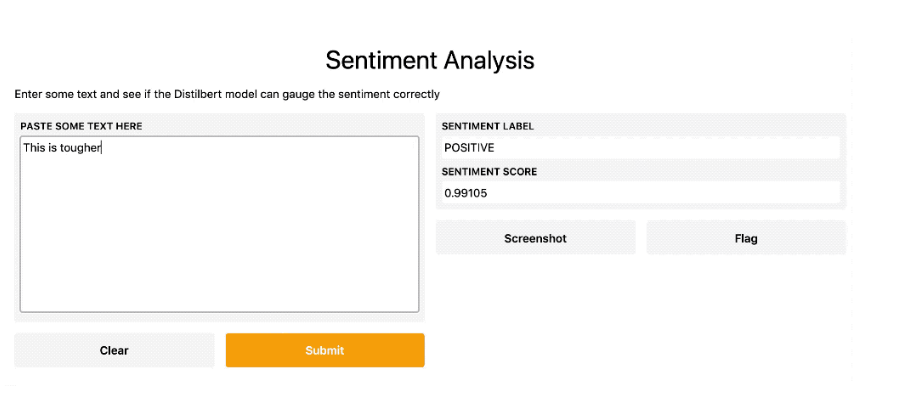

### 讀入訓練模型

In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model

In [ ]:
# 讀入存下的 model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
model = load_model('model_0112')

### Gradio 版面設計

In [ ]:
# 預處理輸入文字
def clean_test(text):
  list1 = list(text)
  text ="".join(list1)
  list2=[]
  list2.append(text)
  ## tokenizer 轉換
  testing = tokenizer.texts_to_sequences(list2)
  testing = np.array(testing)
  return testing

In [ ]:
# prediction
def prediction(input_text):
  input
  result = model.predict(input_text)
  return result[0]

In [ ]:
# 定義 output
def recognize_JD(text):
  input_text = clean_text(text)
  prediction = model.predict(input_text)
  ##result = list('判定為是','判定為非')
  #results[0]["result"],
  return  prediction[0],["Result"]

In [ ]:
# 定義 UI 介面
gradio_ui = gr.Interface(
    fn = recognize_JD,
    title=" JD Recognization",
    description="Enter some job descriptions and see if  model can recognize correctly :)",
    inputs=gr.inputs.Textbox(lines=10, label="Paste job description here!"),
    outputs= 'text'
)

In [ ]:
gradio_ui.launch()

# 存檔

把 model 和訓練權重分開存, 使用上更有彈性。

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
model_json = model.to_json()
open('final_model0112.json','w').write(model_json)
model.save_weights('final_model_weight0112.h5')